In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab  import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/shakil_vai/ecommerceDataset.csv")

In [5]:
df.head()

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [6]:
df.shape

(50424, 2)

In [8]:
df.columns = ['type', 'comments']
df.head()

,type,comments
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


<Axes: xlabel='type', ylabel='count'>

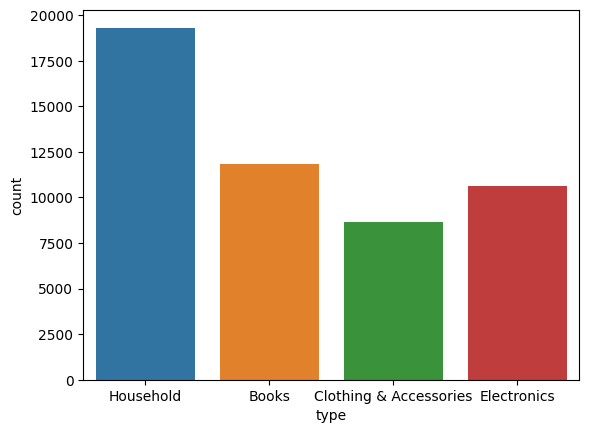

In [9]:
sns.countplot(x=df["type"])

**Text Preprocessing**

In [10]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords,words

In [12]:
def clean_text(text):
    remove_punc1 = [char for char in text if char not in string.punctuation]
    remove_punc2 = ''.join(remove_punc1)

    stop_words_remove = [word for word in remove_punc2.split() if word.lower() not in stopwords.words('bengali')]
    return stop_words_remove

In [23]:
df.head()

,type,comments
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [24]:
df['comments'].head(1).apply(clean_text)

0    [SAF, Floral, Framed, Painting, Wood, 30, inch...
Name: comments, dtype: object

In [25]:
df.isnull().sum()

type        0
comments    0
dtype: int64

**Feature extraction**

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

type        0
comments    0
dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tf = TfidfVectorizer(analyzer=clean_text).fit_transform(df['comments'])

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest =train_test_split(tf,df['type'],test_size=.20,random_state=100)

In [34]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [35]:
ber = BernoulliNB()

In [36]:
ber.fit(xtrain,ytrain)

BernoulliNB()

In [37]:
ber.score(xtest,ytest)

0.8654437283093703

In [38]:
multi = MultinomialNB()

In [39]:
multi.fit(xtrain,ytrain)

MultinomialNB()

In [40]:
multi.score(xtest,ytest)

0.931184928111056

In [41]:
ber.predict(xtest)

array(['Books', 'Electronics', 'Books', ..., 'Clothing & Accessories',
       'Books', 'Household'], dtype='<U22')

In [42]:
ytest

29069          Books
46023    Electronics
24703          Books
41611    Electronics
26015          Books
            ...     
30698          Books
27743          Books
10337      Household
24795          Books
10467      Household
Name: type, Length: 10085, dtype: object